# Guide to use gluon_functions.py 

Let's start by importing the necessary libraries, and the python files where the functions and the canonical diagrams are defined.
Note that the gluon_functions has only been tested for the gluon case, for a general case (functios.py) there will be some issues to be addressed in the future.

**NEEDED STEP**

In [1]:
#External libraries
import numpy as np

#Internal libraries
from functions.can_diagrams.gluon_diagrams import * 
from functions.gluon_functions import *

### Define the diagrams 

In the general case, considering $n$ types of particles, for example we could consider quarks, anti-quarks, gluons, ... In this case we will consider only gluons, but define the instant process in the second order canonical diagrams as a different type of particles. 

The diagrams will be composed of 2 elements, `points` and `paths`.
- `points`: contains the coordinates in the 2D plane where a "connection" can be produced. In general any type of particles could be connected to those points.
- `paths`: contains the ways the points are connected. For that, we indicate the position in the points array of the start and the end of the line/path. This will be the way we distinguish between types of particles.

During the calculations, we may obtain many diagrams of the same form, let's introduce a new array `count` where it will keep count of the repeated diagrams. This way we reduce the amount of unnecessary calculation. (Not functional right now, the output will not reflect the symmetry factor).

Let's see as an example of a possible diagram from the canonical diagrams of 2nd order.

**All the canonical diagrams for the gluons have been defined, so there is no need to define manually diagrams except for a different theory**

In [2]:
points = np.array([[0, 1], [0, 3], [0, 5], [1, 4], [2, 3], [4, 1]])
paths_g = np.array([[1, 5], [2, 4], [3, 4], [5, 6]])
paths_i = np.array([[4, 5]])
paths = combine_paths(paths_g, paths_i)

### Represent the diagrams

Once we have the diagrams defined/calculated, in order for us to visualize them, by using the function `represent_diagram`. This function take as parameters,
- `points`: The points array for a single diagram, following the syntax in **Define the diagrams**
- `all_paths`: The paths array for a single diagram, following the syntax in **Define the diagrams**

Optional parameters:
- `index` (default `False`): indicate if the index number to label the points is shown in the diagram.
- `directory`(default `""`): indicate the path to where safe the plot, if no path is indicated the output be shown instead of safed.
- `colors`(default `["tab:blue", "tab:red", "black"]`): the colors used for the different particles
- `line`(default `["solid", "solid", "photon"]`): indicate the type of line used for the particles. (Accept most matplotlib linestyles, photon is an additional style added)
- `count` (default `0`): The array to indicate the symmetry factor of each diagram, and indicate in the plot. If 0 no number will be shown

**In practice due to the amount of diagrams to work with there will be no need to use this functions directly**

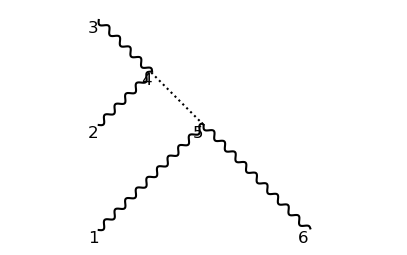

In [3]:
represent_diagram(points, paths, index=True, colors = ['black', 'black'], line = ['photon', 'dotted'])

### Indicate the process of interest and the order to calculate.

In order to streamline the calculations, it is needed to indicate (before the calculations) the type of process that we are interested in studying, and till which order do we plan to calculate. This way we can remove the diagrams that will not contribute to the process, reducing the amount of computation.

We will use `typeofproc` to indicate the number of incoming and outgoing particles of each type of particles, following the structure. 
- Axis 0: type of particle
- Axis 1: incoming `typeofproc[:, 1]`, and outgoing `typeofproc[:, 2]`, since the time evolve from right-hand to left.

**NEEDED STEP**

In [4]:
typeofproc = [[2, 1]]
tillorder = 5

### Represent all diagrams form a certain order.
The `represent_diagram` function is useful for a single diagram, however, when we have all the diagrams for a certain order, is preferable to use `represent_order`.

`represent_order(points, paths, count_, typeofproc, index_ = True,  lines_ = ["solid", "dotted"], colors_ = ["black", "black"], directory_ = "", docount = True, spacing = 1.0)`

- `docount`: indicate if the symmetry factor will be reflected in the diagrams.
- `spacing`: there is a function that forces the points to take equal spacing in the x-axis, this parameter indicates the distance.

### Calculate order by order

To calculate till order $n$, it will be needed to use the `next_order` functions with argument the previous diagrams calculated to produce the next order.

**NEEDED STEP**

In [5]:
points2, paths2, count2 = next_order([can_points_1st], [can_paths_1st], [can_number_1st], typeofproc, tillorder)
points3, paths3, count3 = next_order([can_points_1st, points2], [can_paths_1st ,paths2], [can_number_1st, count2],typeofproc, tillorder)
points4, paths4, count4 = next_order([can_points_1st, points2, points3], [can_paths_1st ,paths2, paths3], [can_number_1st, count2, count3], typeofproc, tillorder)
points5, paths5, count5 = next_order([can_points_1st, points2, points3, points4], [can_paths_1st ,paths2, paths3, paths4], [can_number_1st, count2, count3, count4], typeofproc, tillorder)

counter_points5, counter_paths5, counter_count5 = counterterms(points5, paths5, count5)

100%|██████████| 142/142 [00:00<00:00, 19678.56it/s]


/Users/zhuozhuoliu/Documents/Uni/TFG/edp-renormalization/python/functions/gluon_functions.py:163: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(5,3))


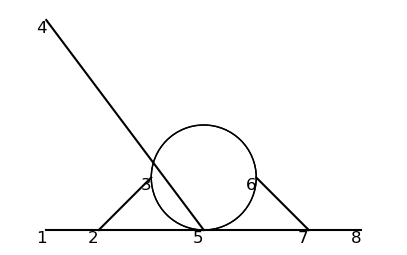

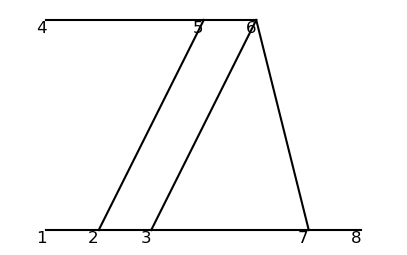

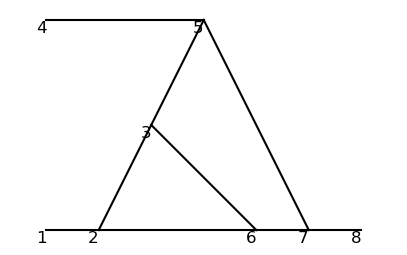

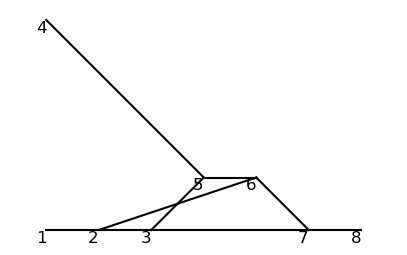

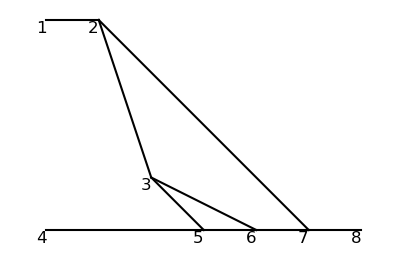

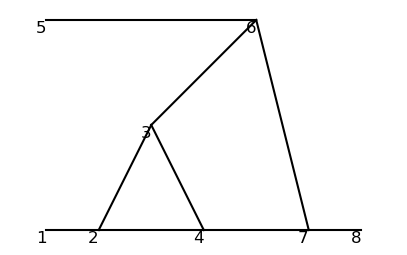

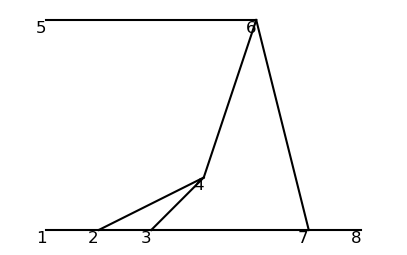

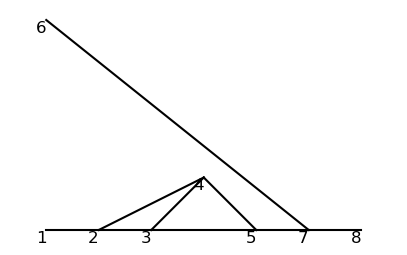

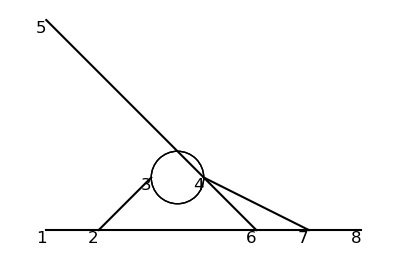

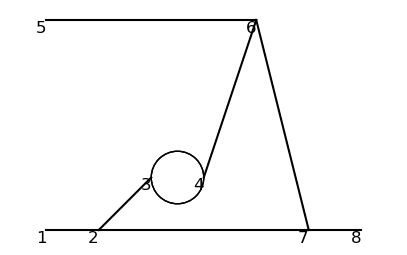

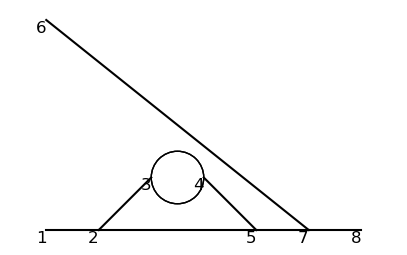

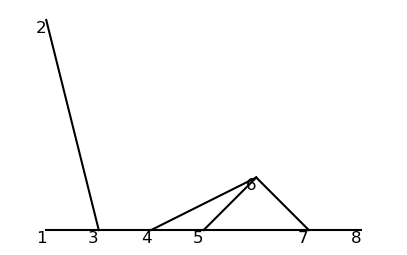

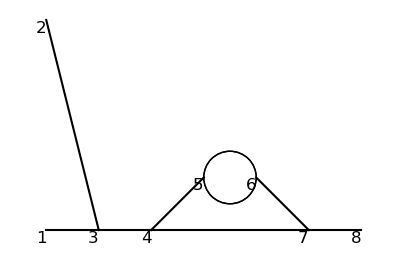

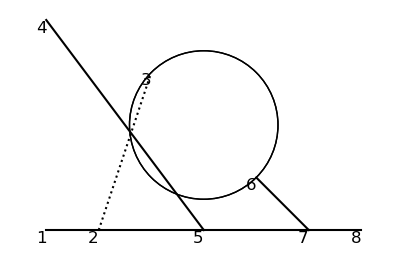

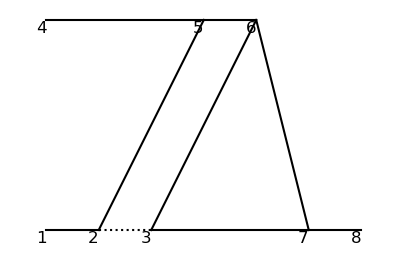

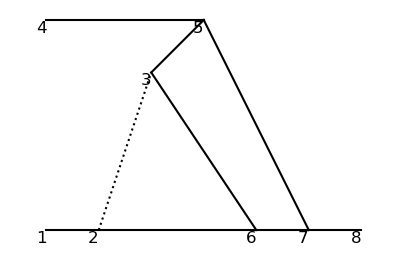

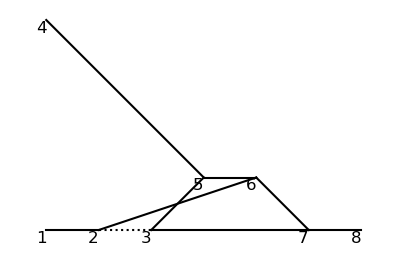

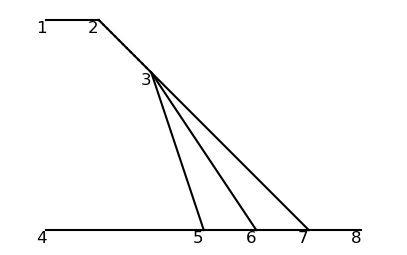

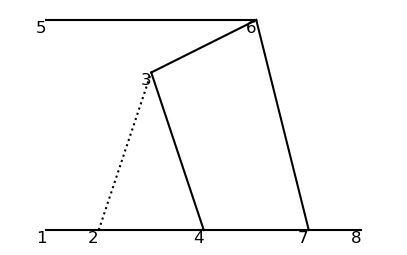

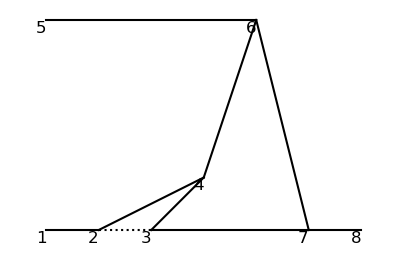

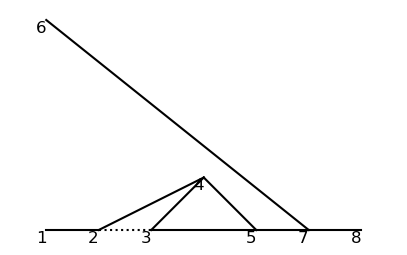

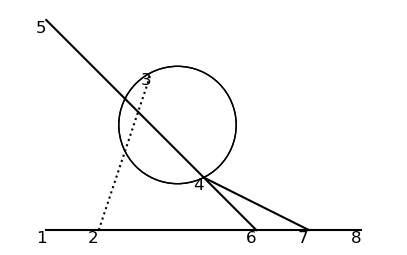

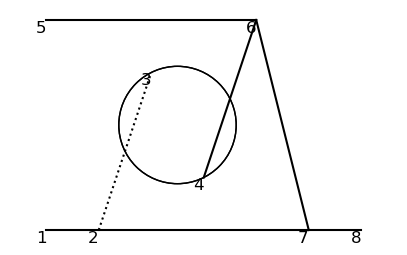

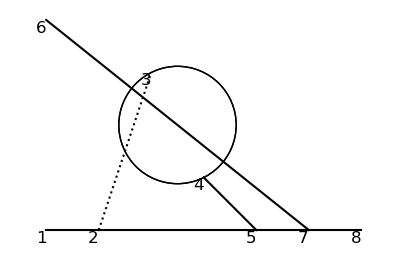

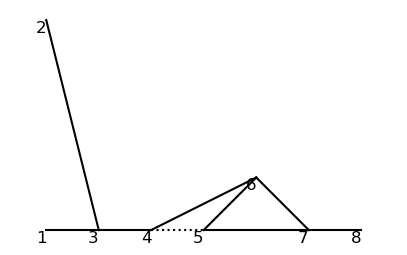

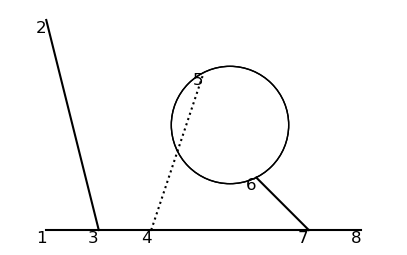

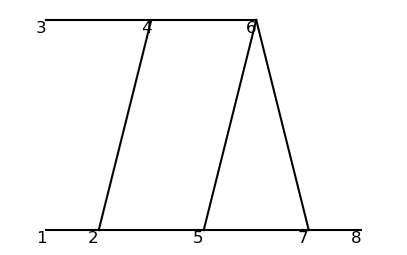

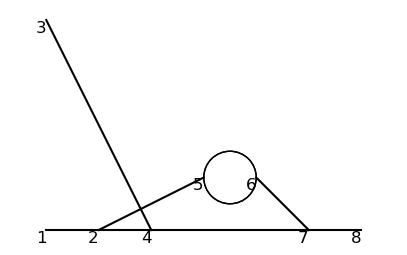

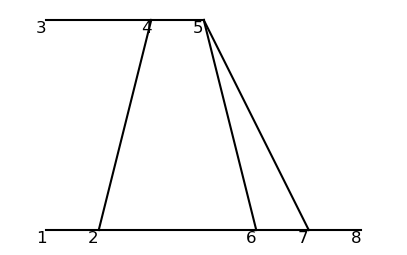

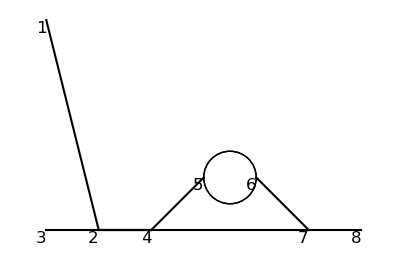

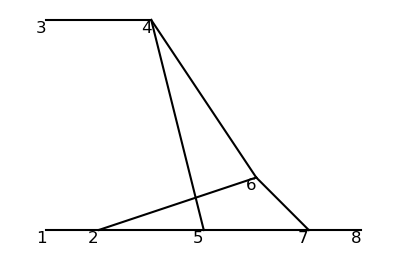

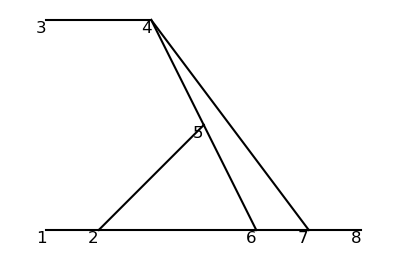

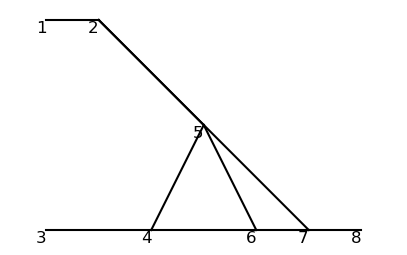

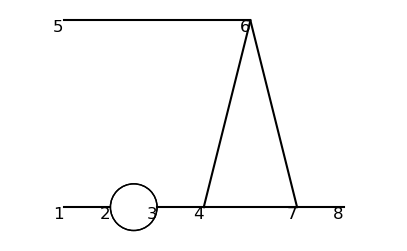

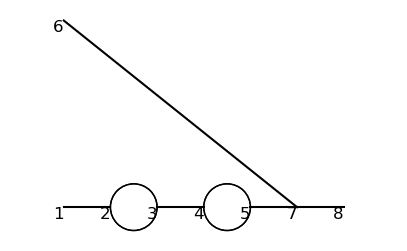

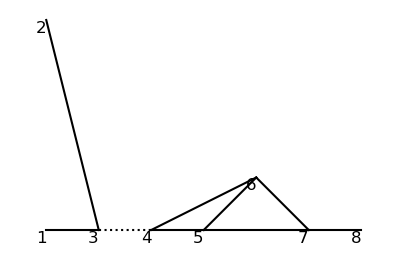

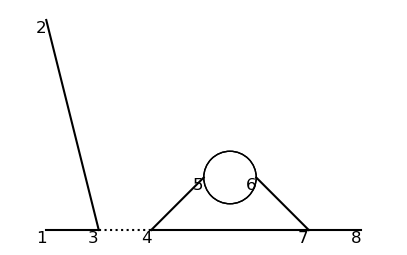

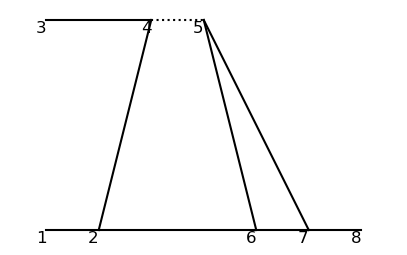

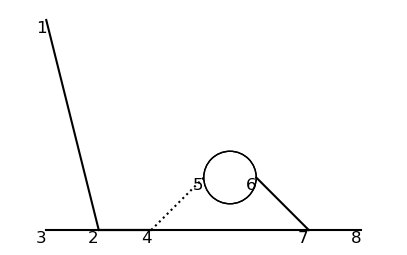

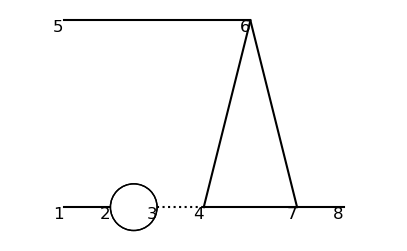

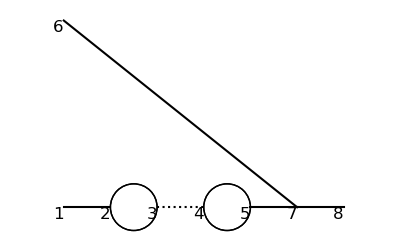

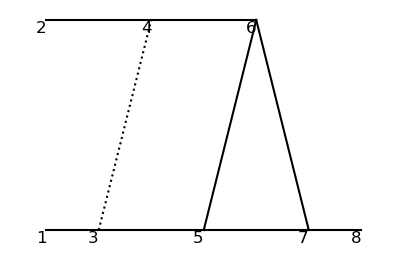

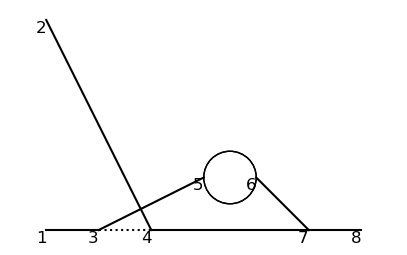

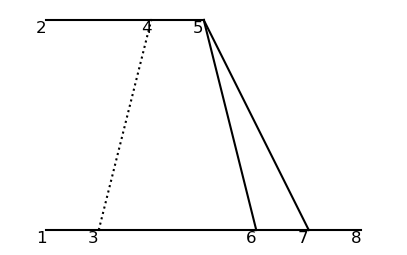

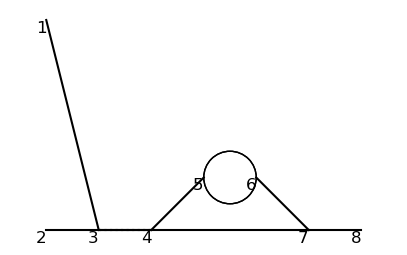

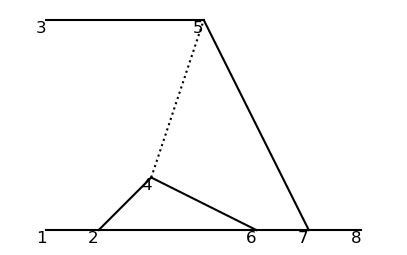

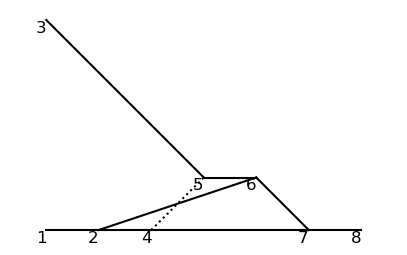

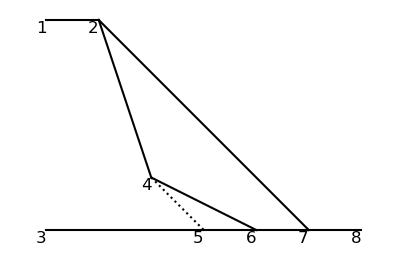

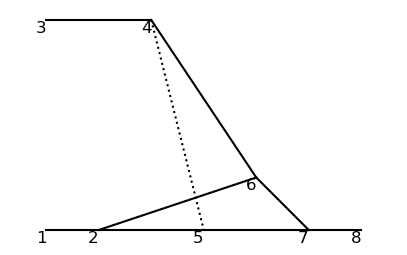

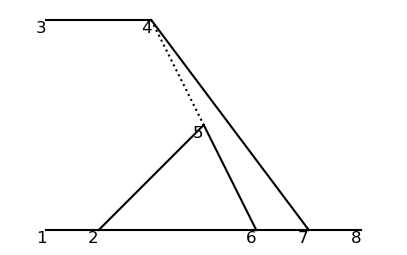

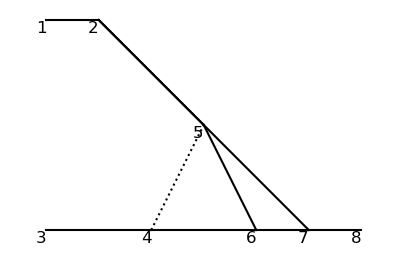

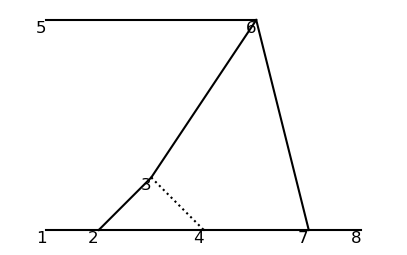

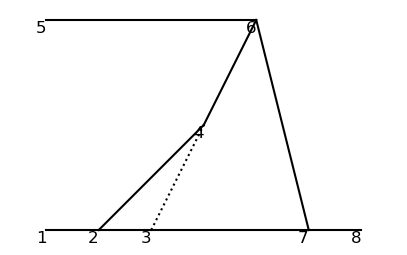

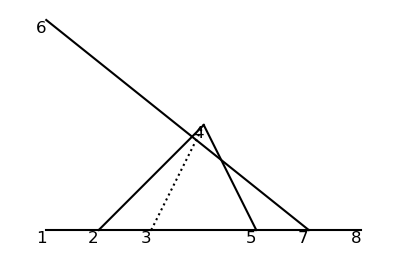

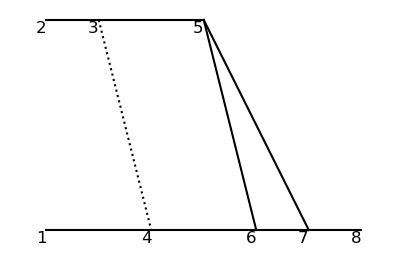

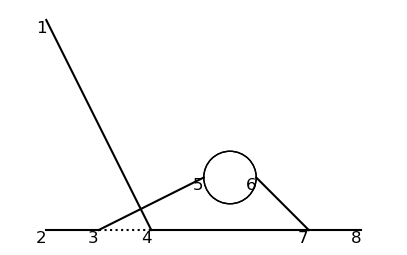

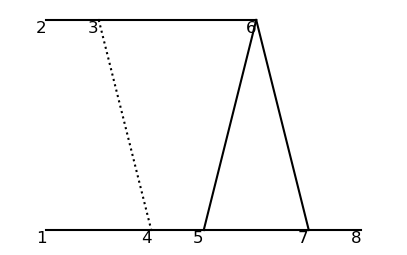

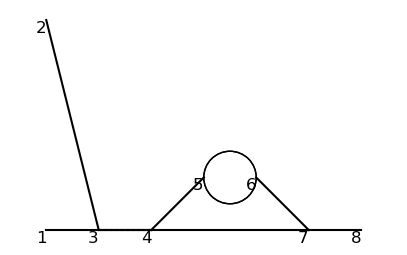

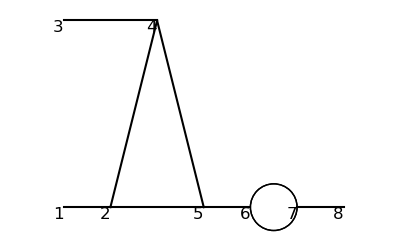

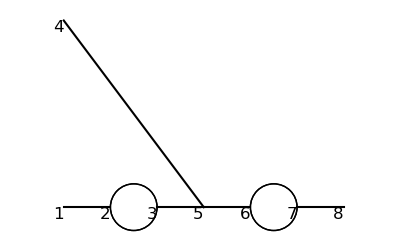

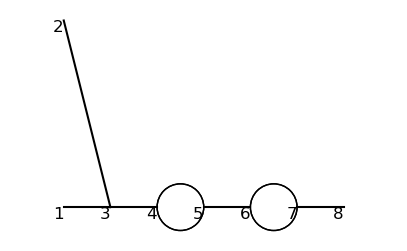

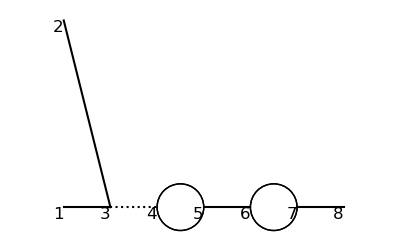

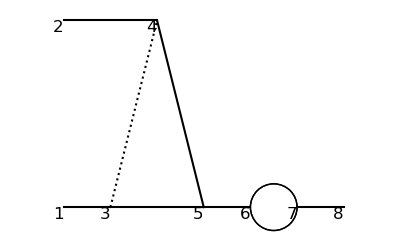

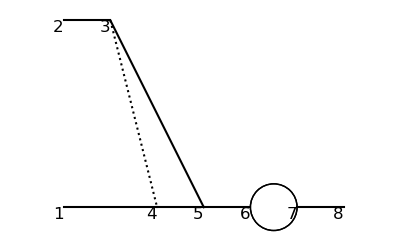

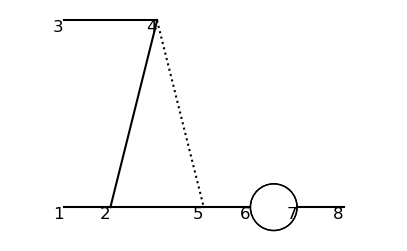

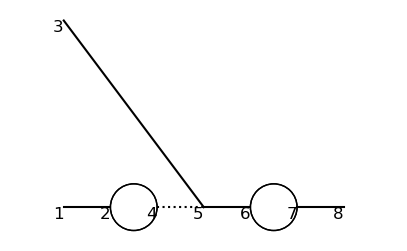

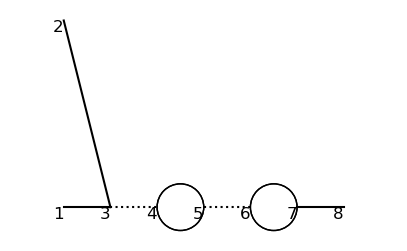

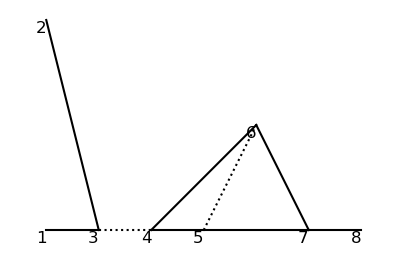

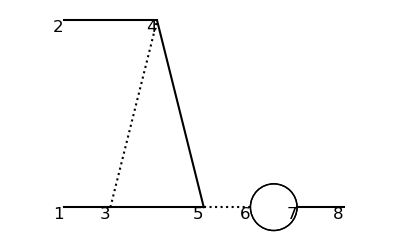

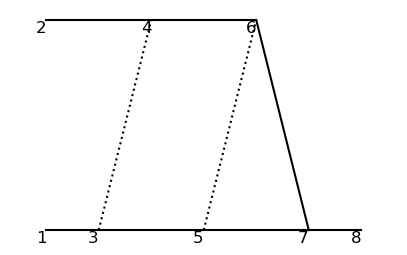

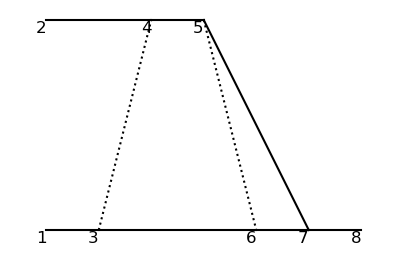

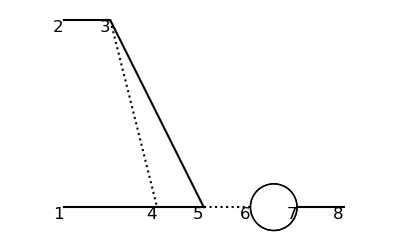

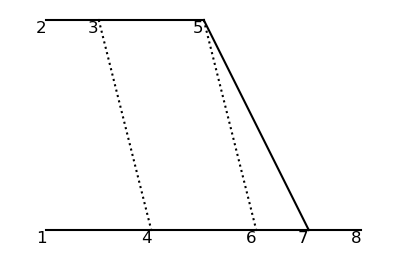

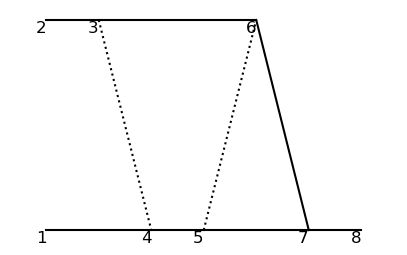

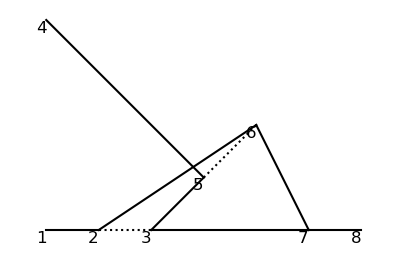

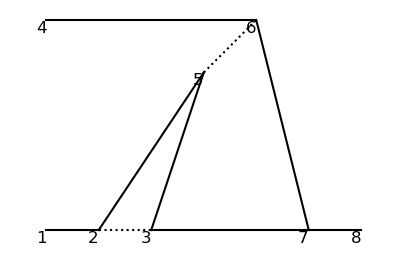

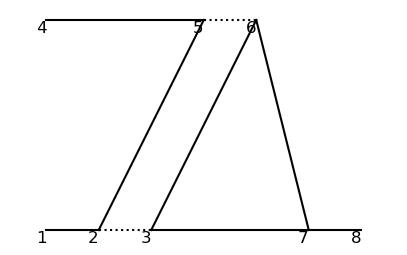

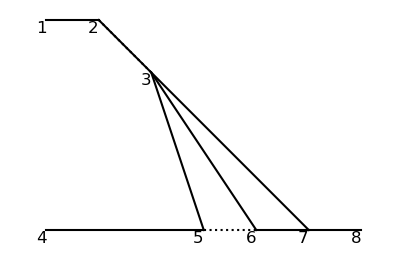

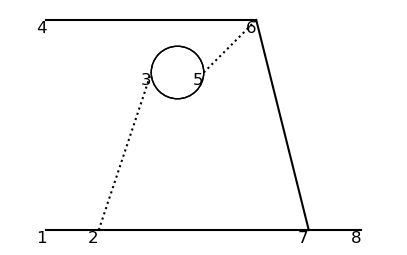

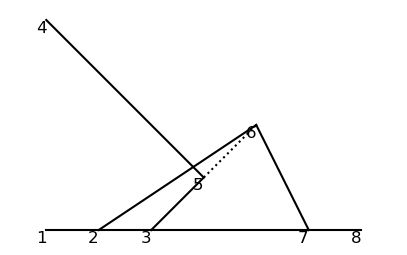

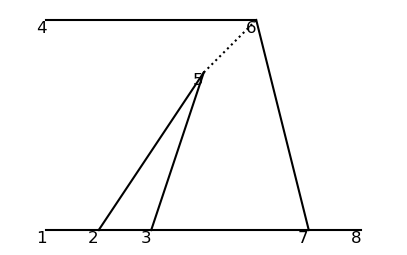

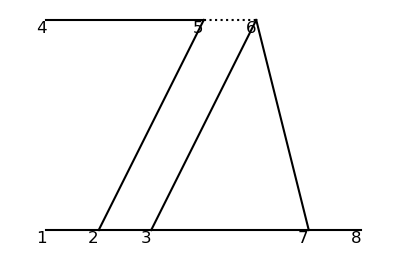

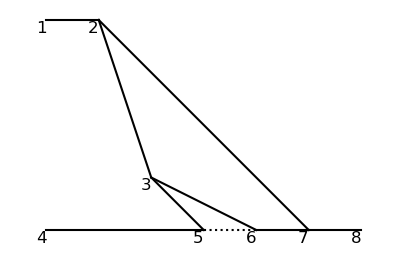

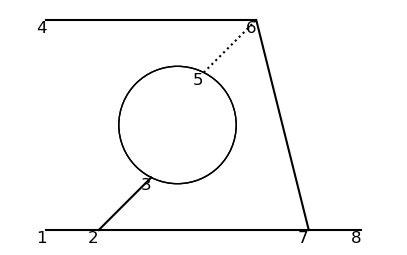

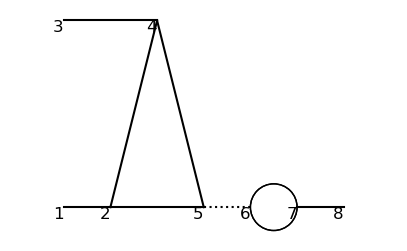

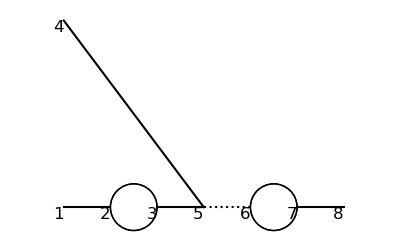

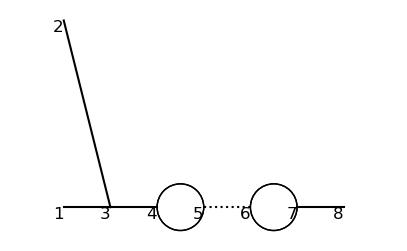

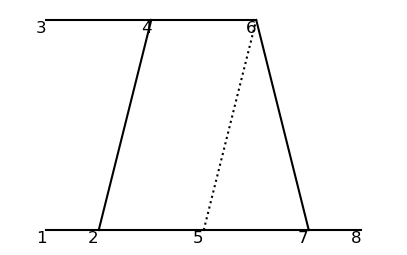

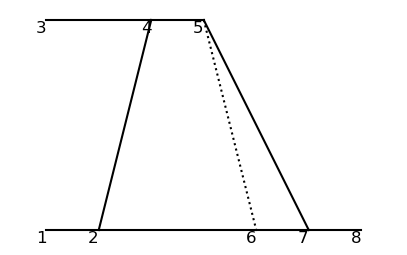

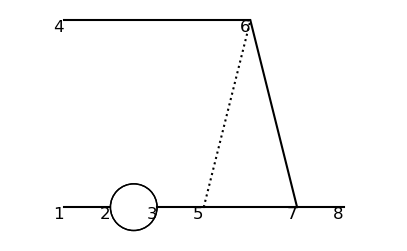

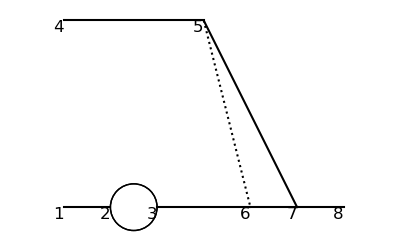

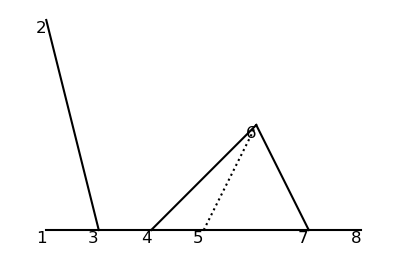

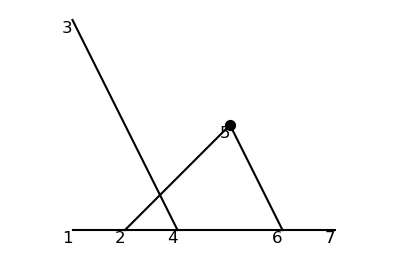

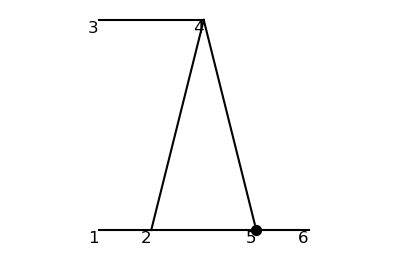

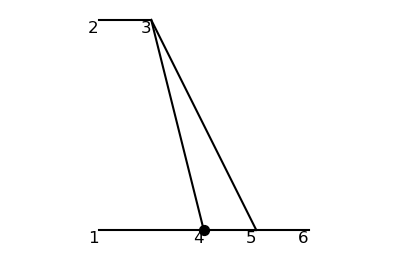

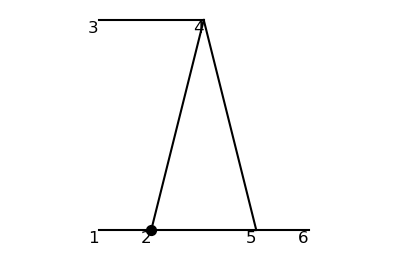

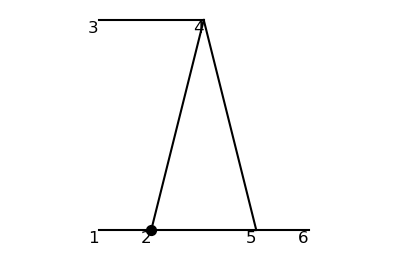

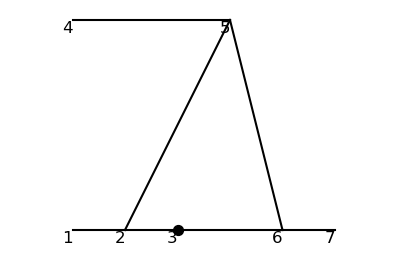

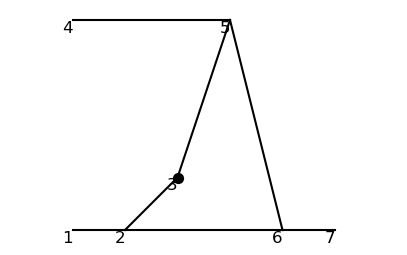

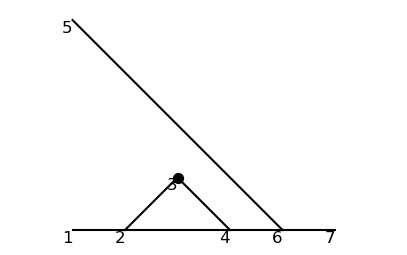

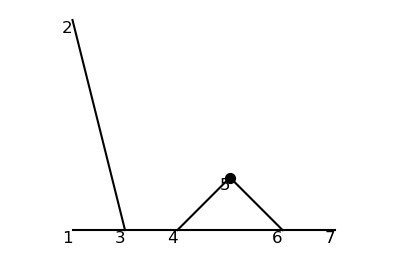

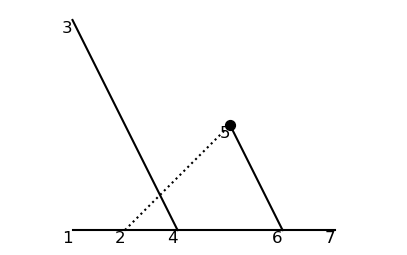

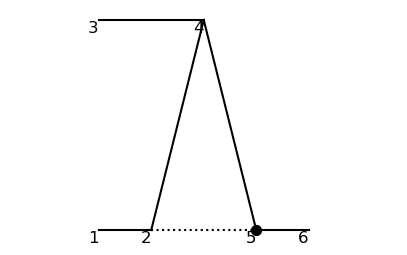

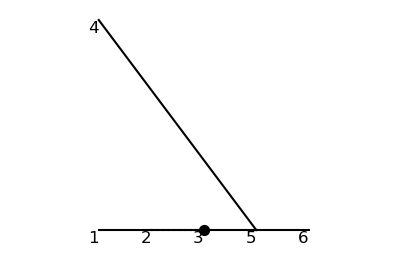

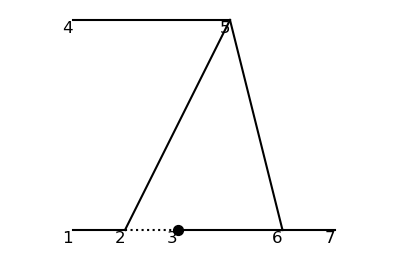

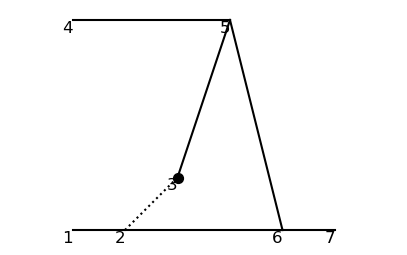

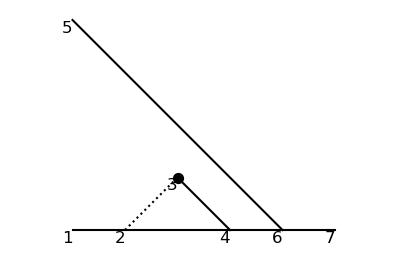

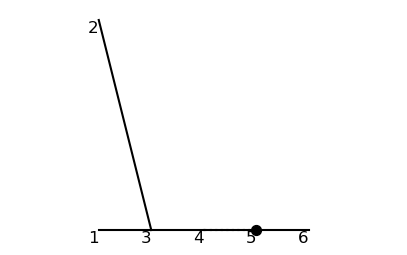

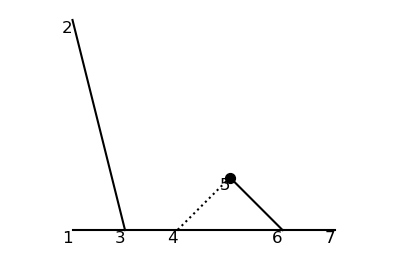

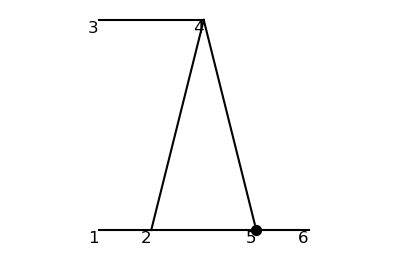

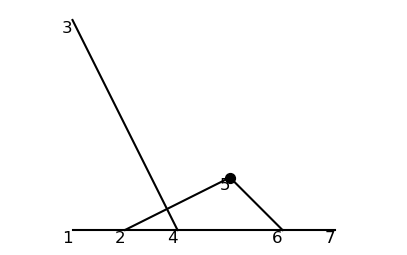

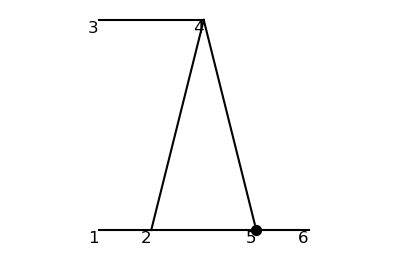

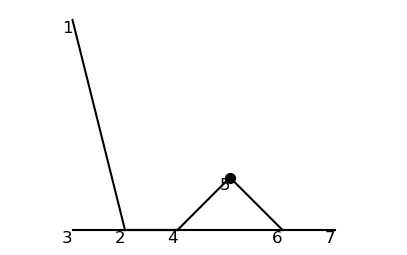

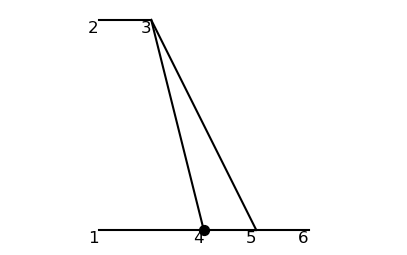

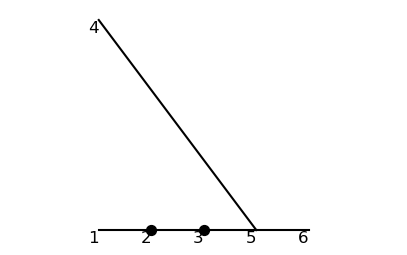

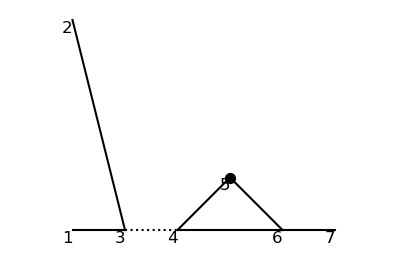

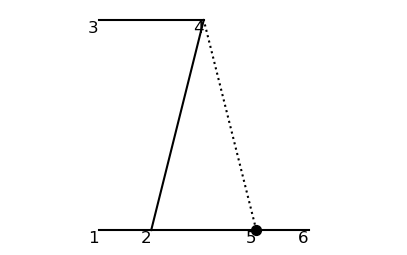

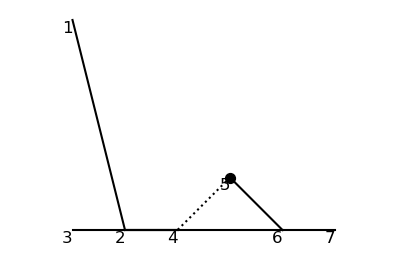

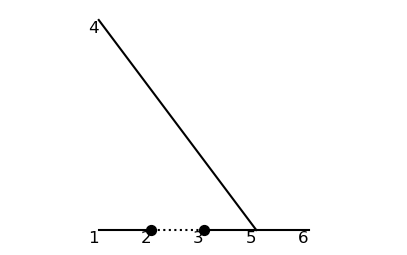

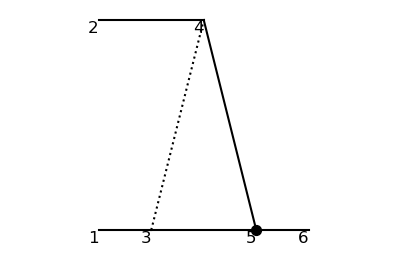

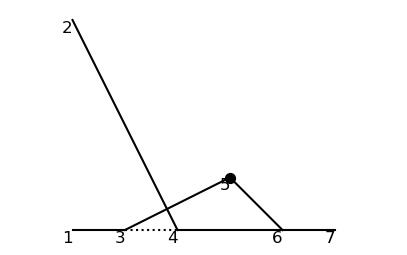

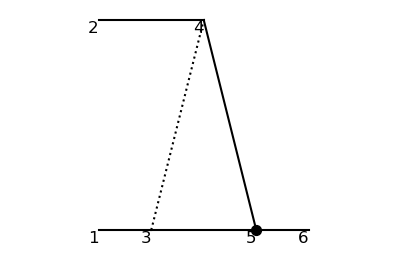

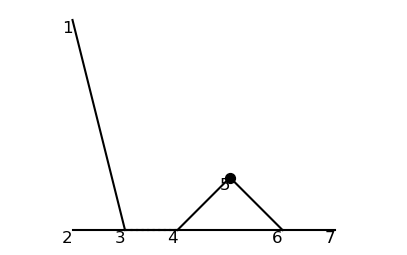

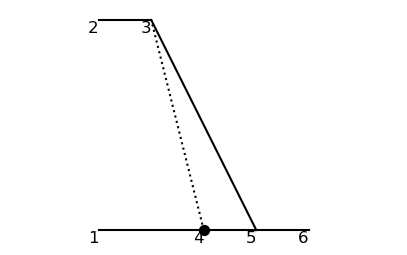

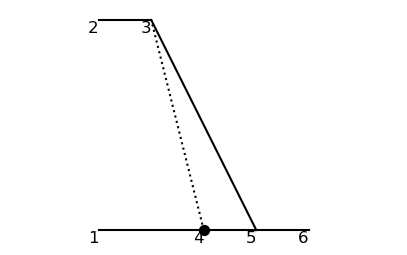

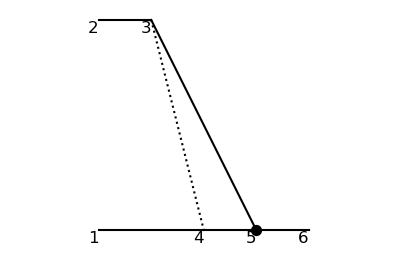

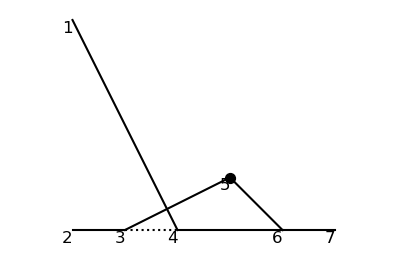

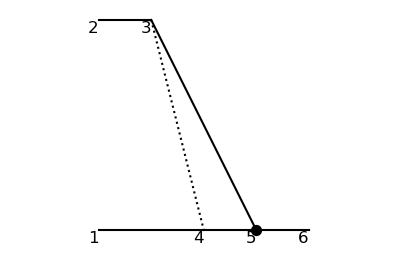

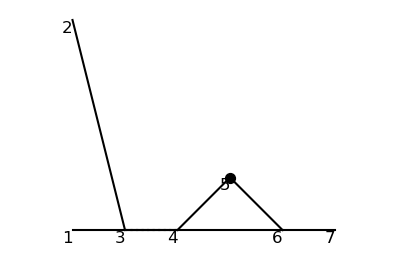

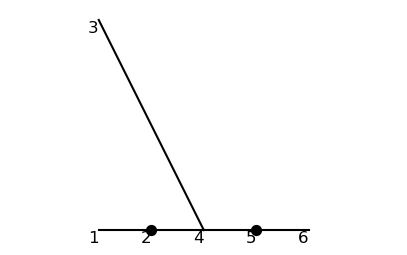

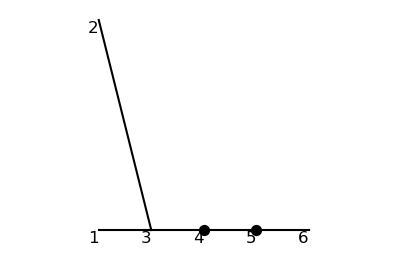

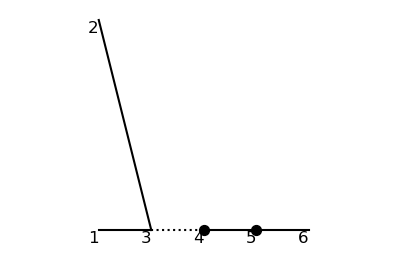

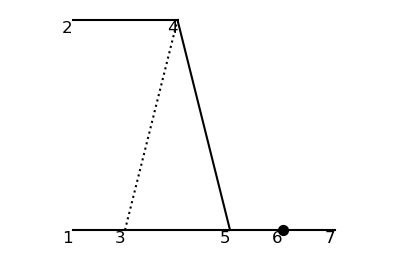

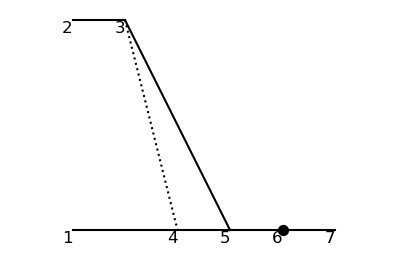

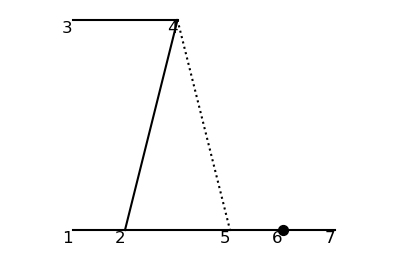

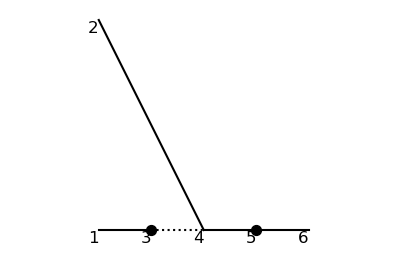

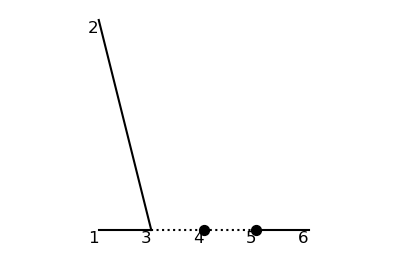

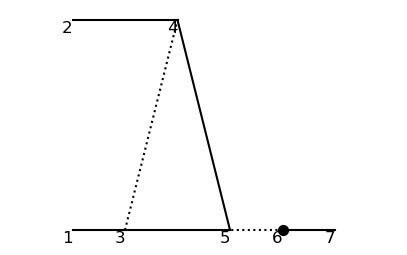

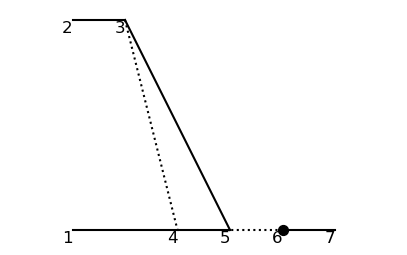

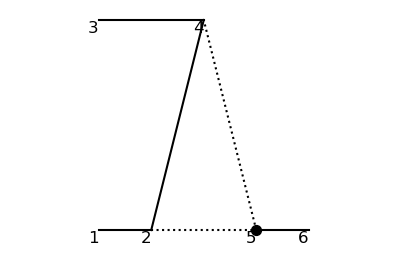

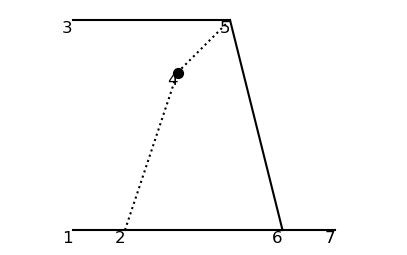

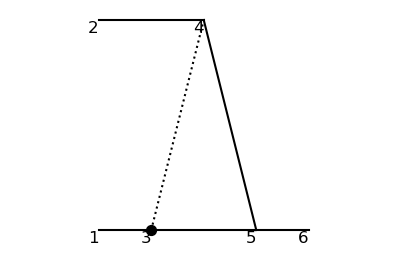

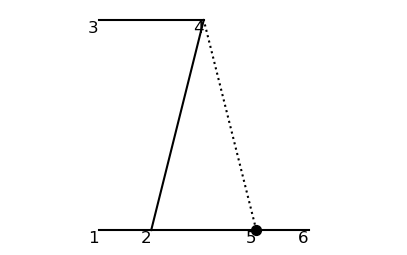

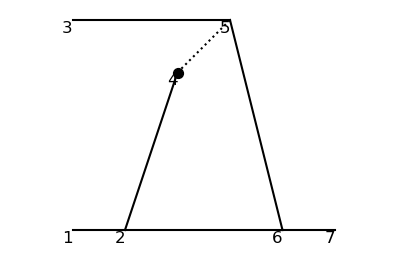

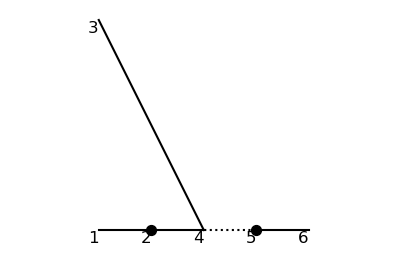

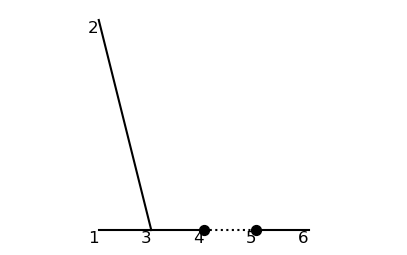

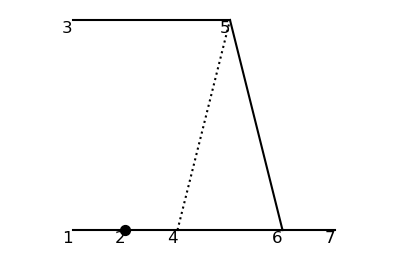

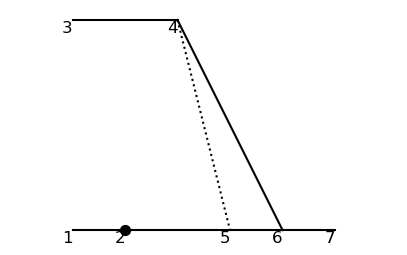

In [6]:
represent_order(points5, paths5, count5, typeofproc, docount=False)
represent_order(counter_points5, counter_paths5, counter_count5, typeofproc, docount=False)